#### Name: Jaspreet Singh

#### PGID: 12110053

In [331]:
# Setting up the Environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering as ac
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

In [332]:
# Loading the DataSet
ewa = pd.read_csv("EastWestAirlinesCluster.csv")

In [333]:
# Checking info about Data
ewa.shape 

(3999, 12)

In [334]:
ewa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [335]:
# Checking Missing Values
ewa.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [336]:
# Checking data head
ewa.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0


### Part - A

Standardization becomes important when you have multiple dimensions (features). To bring uniformity in Unit and Magnitude of the features. It makes comparison easy across different dimensions. For Example if we have features like Height, Weight and Age of the employees and now if we want to cluster or group people based upon these 3 dimensions it will become difficult for machine to understand the difference in units and magnitude as Height, Weight and Age can be in centimeters, kilograms and years respectively. Also, variation is also different for each dimension.

With Standardization we can overcome this problem of difference in scaling (Units and Magnitude) and bring down all the dimensions on same scale.

Scaling up the East West Airline Customer Data for Cluster Analysis

-- Data requires standardisation as there are 11 different dimensions.

-- I will not apply standardisation on Award Column as it is binary.

-- Also, cc1_miles, cc2_miles, & cc3_miles are discrete and range is also very small.  

In [337]:
ewa_scaled_norm = normalize(ewa)

In [338]:
ewa_scaled_norm = pd.DataFrame(data = ewa_scaled_norm, columns = ewa.columns)

In [339]:
# -- We donot want to normalize these columns so replacing them with orignal values.
ewa_scaled_norm = ewa_scaled_norm.drop(['ID#', 'cc1_miles','cc2_miles','cc3_miles','Award?'], 1)
ewa_scaled_norm['Award?'] = ewa['Award?']
ewa_scaled_norm['cc1_miles'] = ewa['cc1_miles']
ewa_scaled_norm['cc2_miles'] = ewa['cc2_miles']
ewa_scaled_norm['cc3_miles'] = ewa['cc3_miles']
ewa_scaled_norm.head(3)

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc1_miles,cc2_miles,cc3_miles
0,0.970414,0.0,0.006000,0.000034,0.0,0.0,0.241371,0,1,1,1
1,0.940209,0.0,0.010504,0.000098,0.0,0.0,0.340437,0,1,1,1
2,0.981113,0.0,0.097817,0.000095,0.0,0.0,0.166880,0,1,1,1


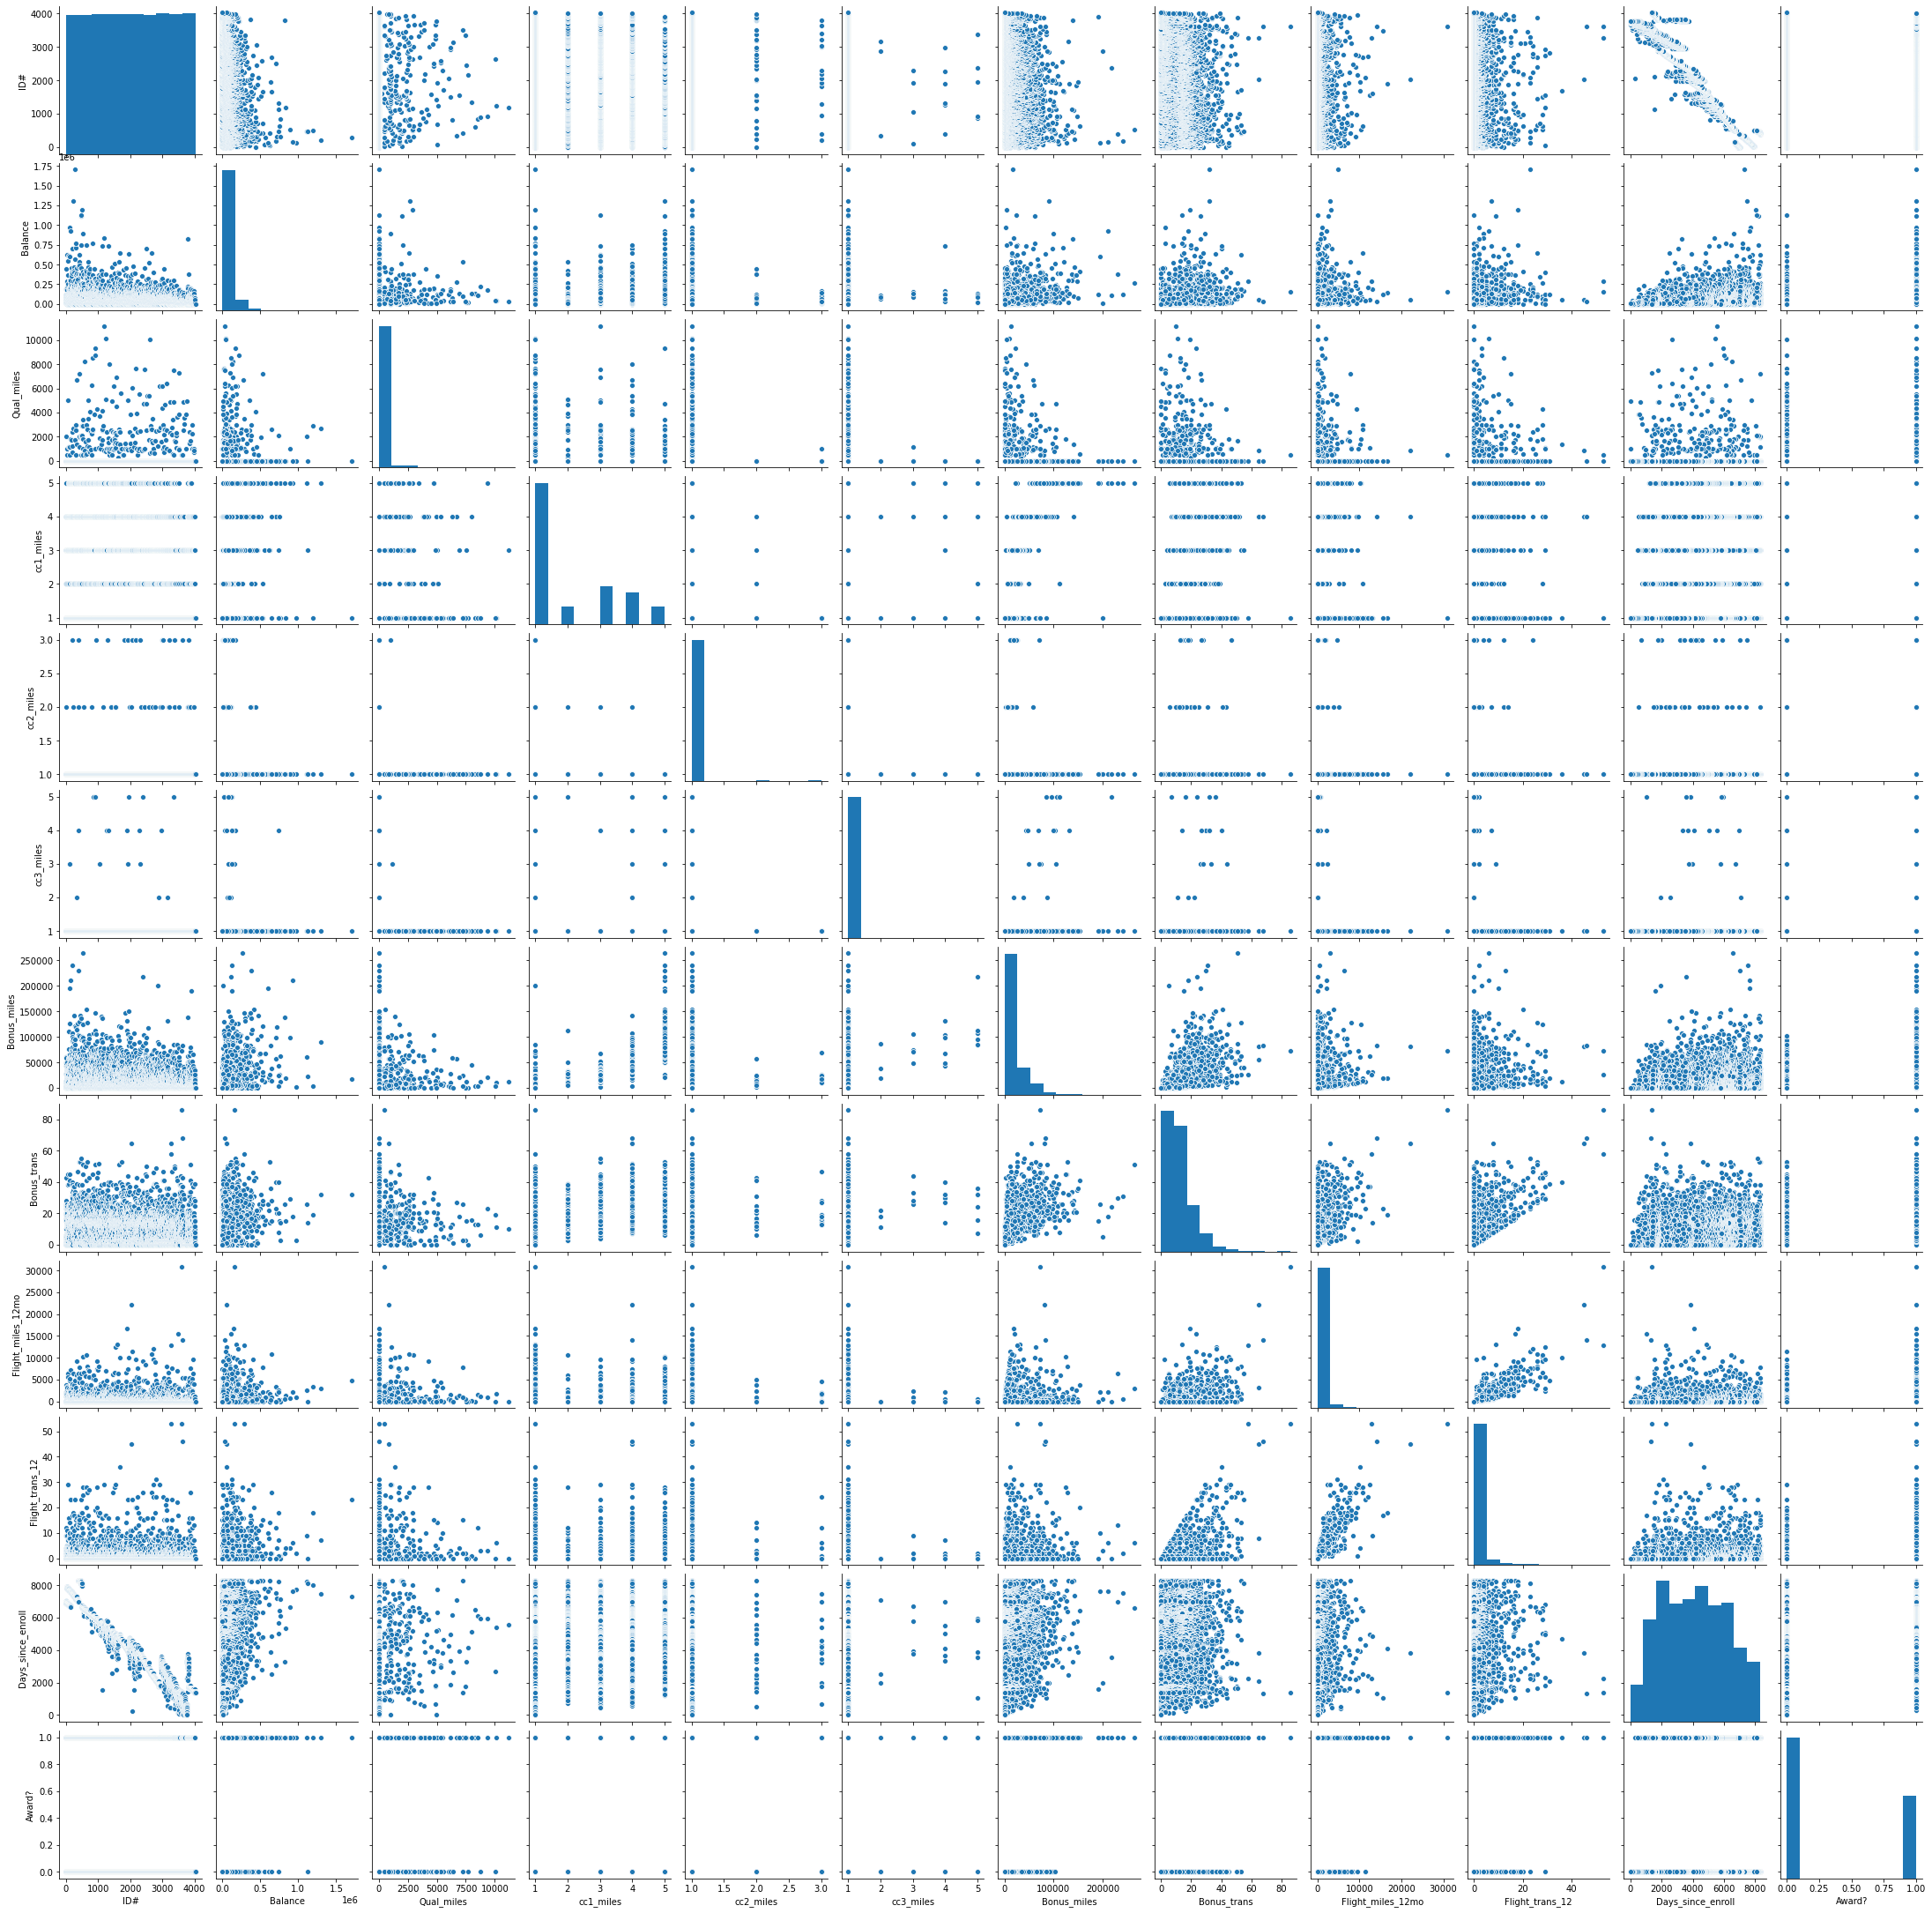

In [340]:
# Checking visually 
sns.pairplot(ewa)
plt.show()

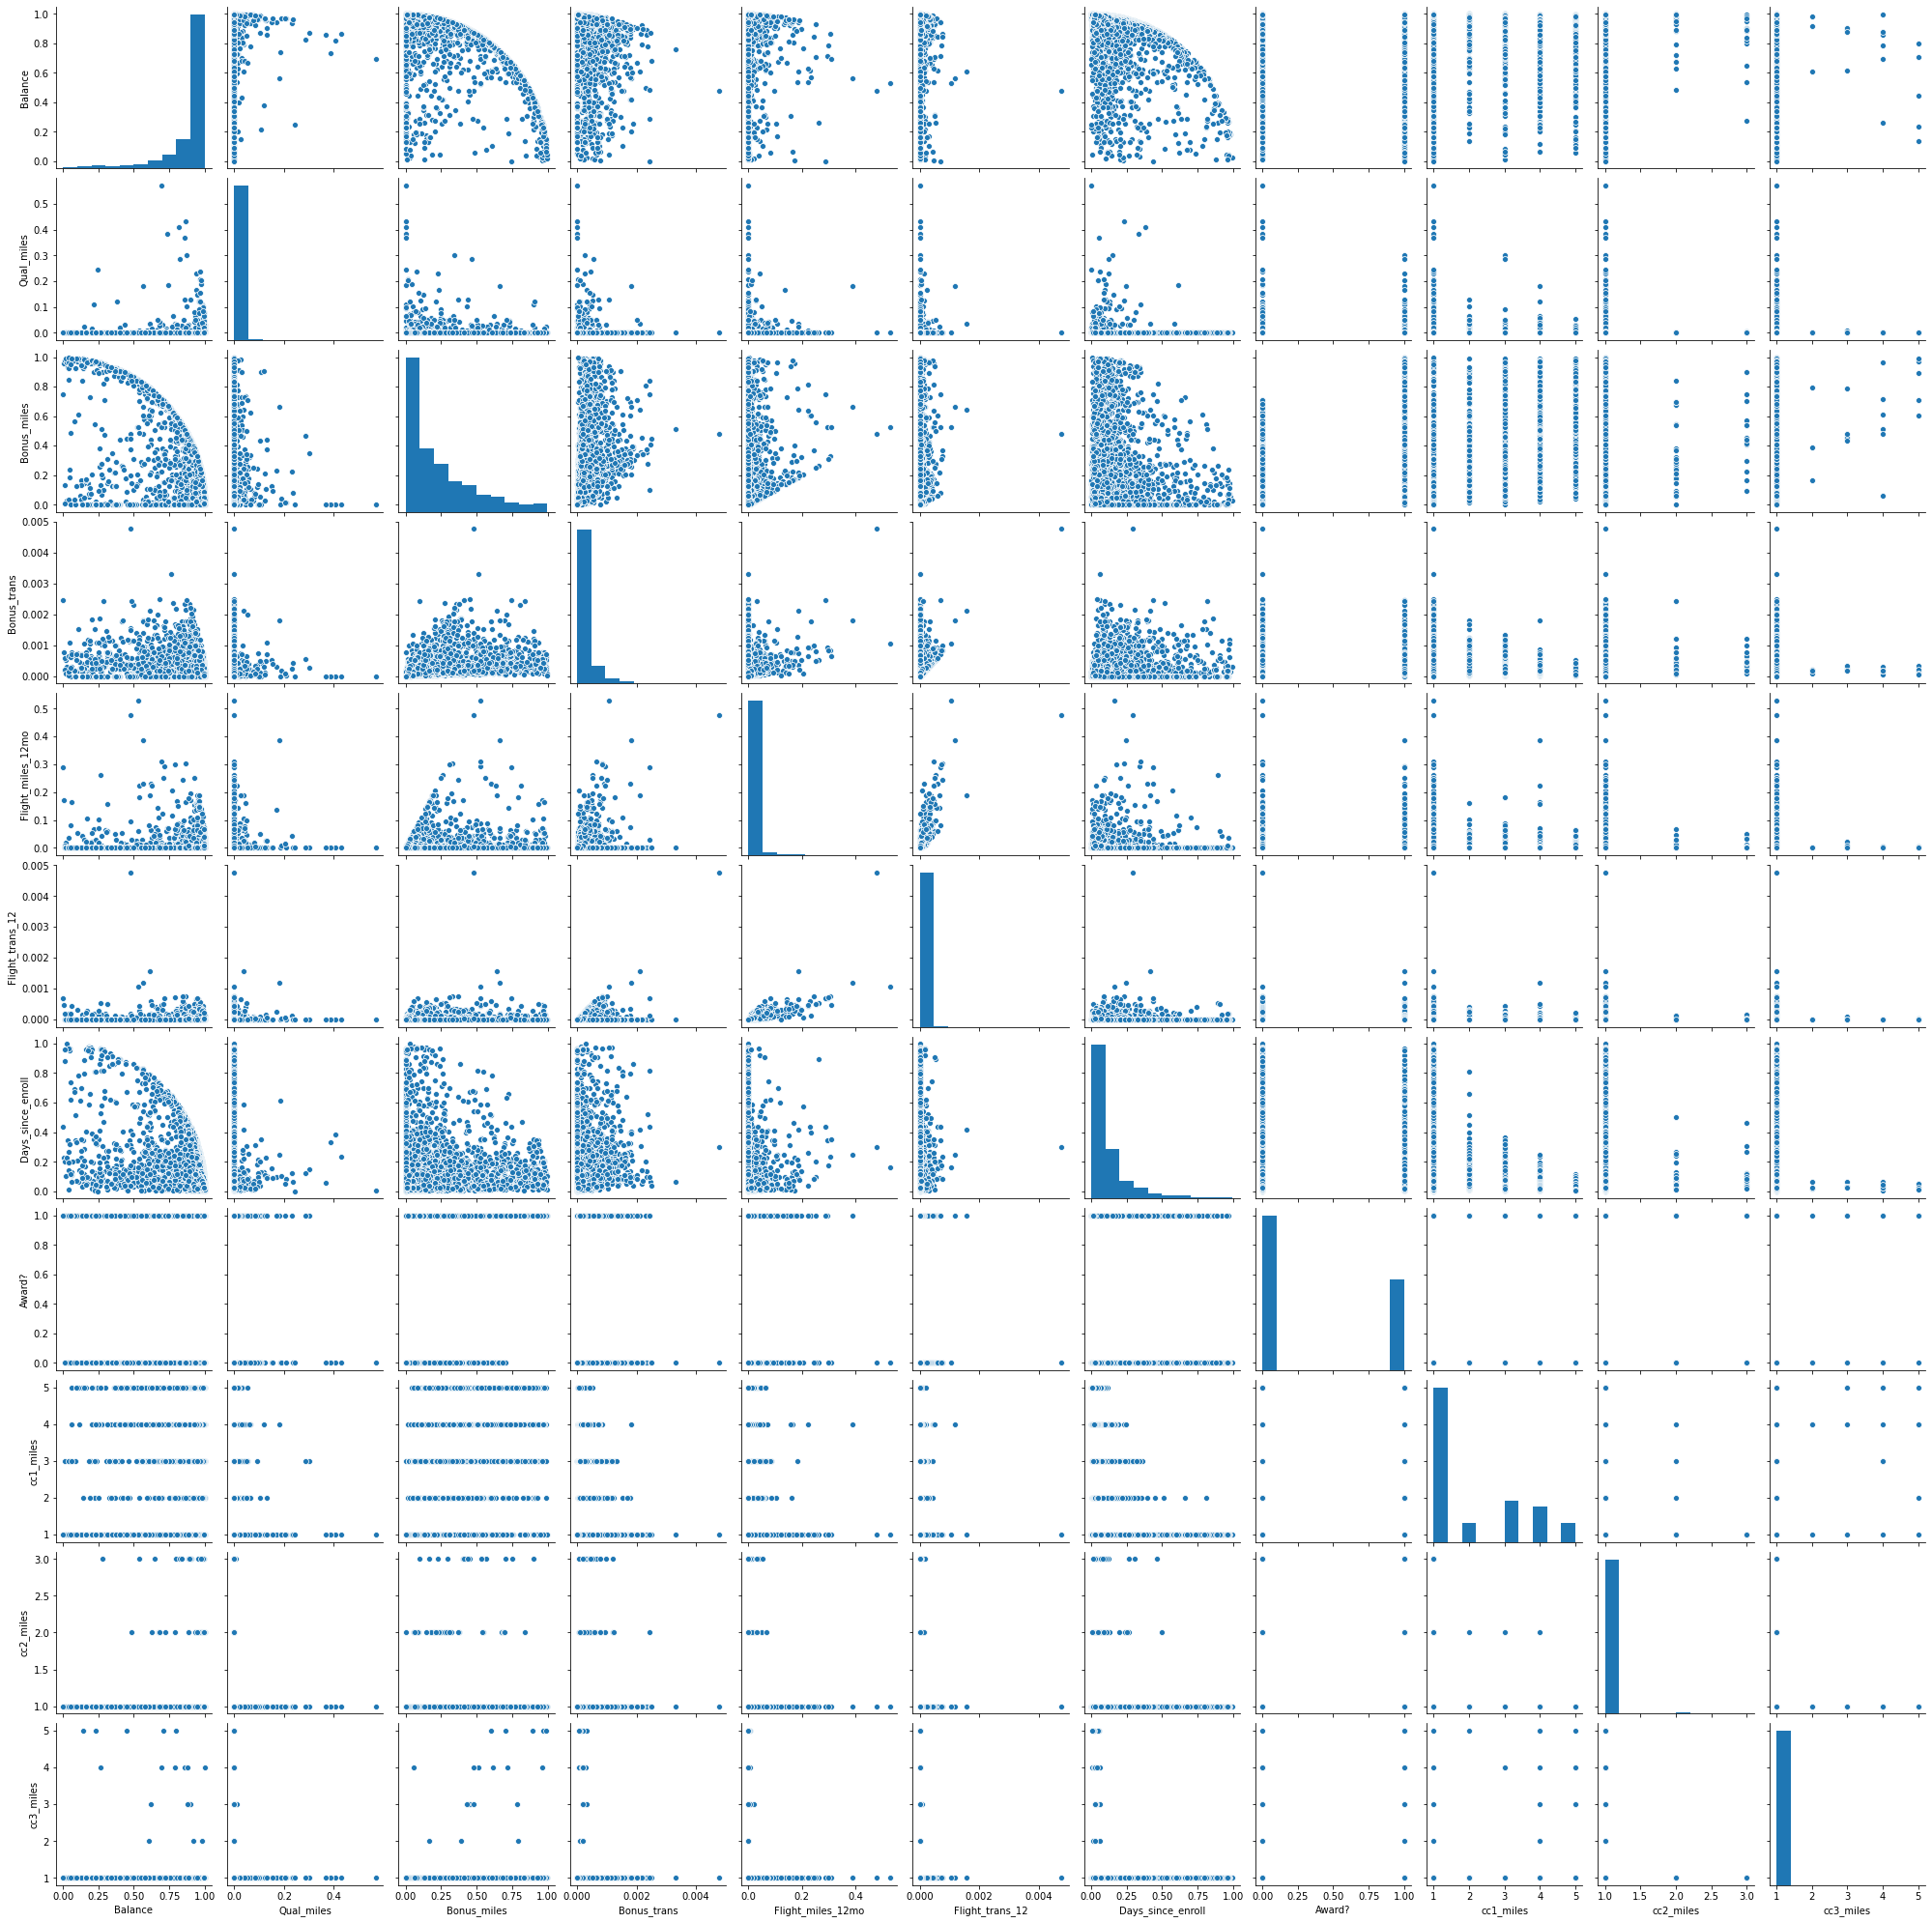

In [341]:
# Checking visually scaled data 
sns.pairplot(ewa_scaled_norm)
plt.show()

Normalization Scaling doesn't look right as features are highly skewed

Let us try log transformation as it is better when data is skewed

In [342]:
ewa_scaled = ewa.drop(['ID#', 'cc1_miles','cc2_miles','cc3_miles','Award?'], 1)

In [343]:
ewa_scaled.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,174,1,0,0,7000
1,19244,0,215,2,0,0,6968
2,41354,0,4123,4,0,0,7034
3,14776,0,500,1,0,0,6952
4,97752,0,43300,26,2077,4,6935


In [344]:
for col in ewa_scaled.columns:
    print(col, ':', str(ewa_scaled[col].min()))

Balance : 0
Qual_miles : 0
Bonus_miles : 0
Bonus_trans : 0
Flight_miles_12mo : 0
Flight_trans_12 : 0
Days_since_enroll : 2


In [345]:
# Added a constant (+1) to each column's each row before doing log transformation as columns were containing 0 which will hinder the log transformation process.
for col in ewa_scaled.columns:
    ewa_scaled[col] = ewa_scaled[col].apply(lambda x: x+1)

In [346]:
for col in ewa_scaled.columns:
    print(col, ':', str(ewa_scaled[col].min()))

Balance : 1
Qual_miles : 1
Bonus_miles : 1
Bonus_trans : 1
Flight_miles_12mo : 1
Flight_trans_12 : 1
Days_since_enroll : 3


In [347]:
# Performing log transformation on each column
for col in ewa_scaled.columns:
    ewa_scaled[col] = np.log(ewa_scaled[col])

In [348]:
ewa_scaled.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,10.245089,0.0,5.164786,0.693147,0.000000,0.000000,8.853808
1,9.865007,0.0,5.375278,1.098612,0.000000,0.000000,8.849227
2,10.629949,0.0,8.324579,1.609438,0.000000,0.000000,8.858653
3,9.600827,0.0,6.216606,0.693147,0.000000,0.000000,8.846929
4,11.490199,0.0,10.675931,3.295837,7.639161,1.609438,8.844481


In [349]:
# Adding rest of the columns which were discrete
ewa_scaled['Award?'] = ewa['Award?']
ewa_scaled['cc1_miles'] = ewa['cc1_miles']
ewa_scaled['cc2_miles'] = ewa['cc2_miles']
ewa_scaled['cc3_miles'] = ewa['cc3_miles']

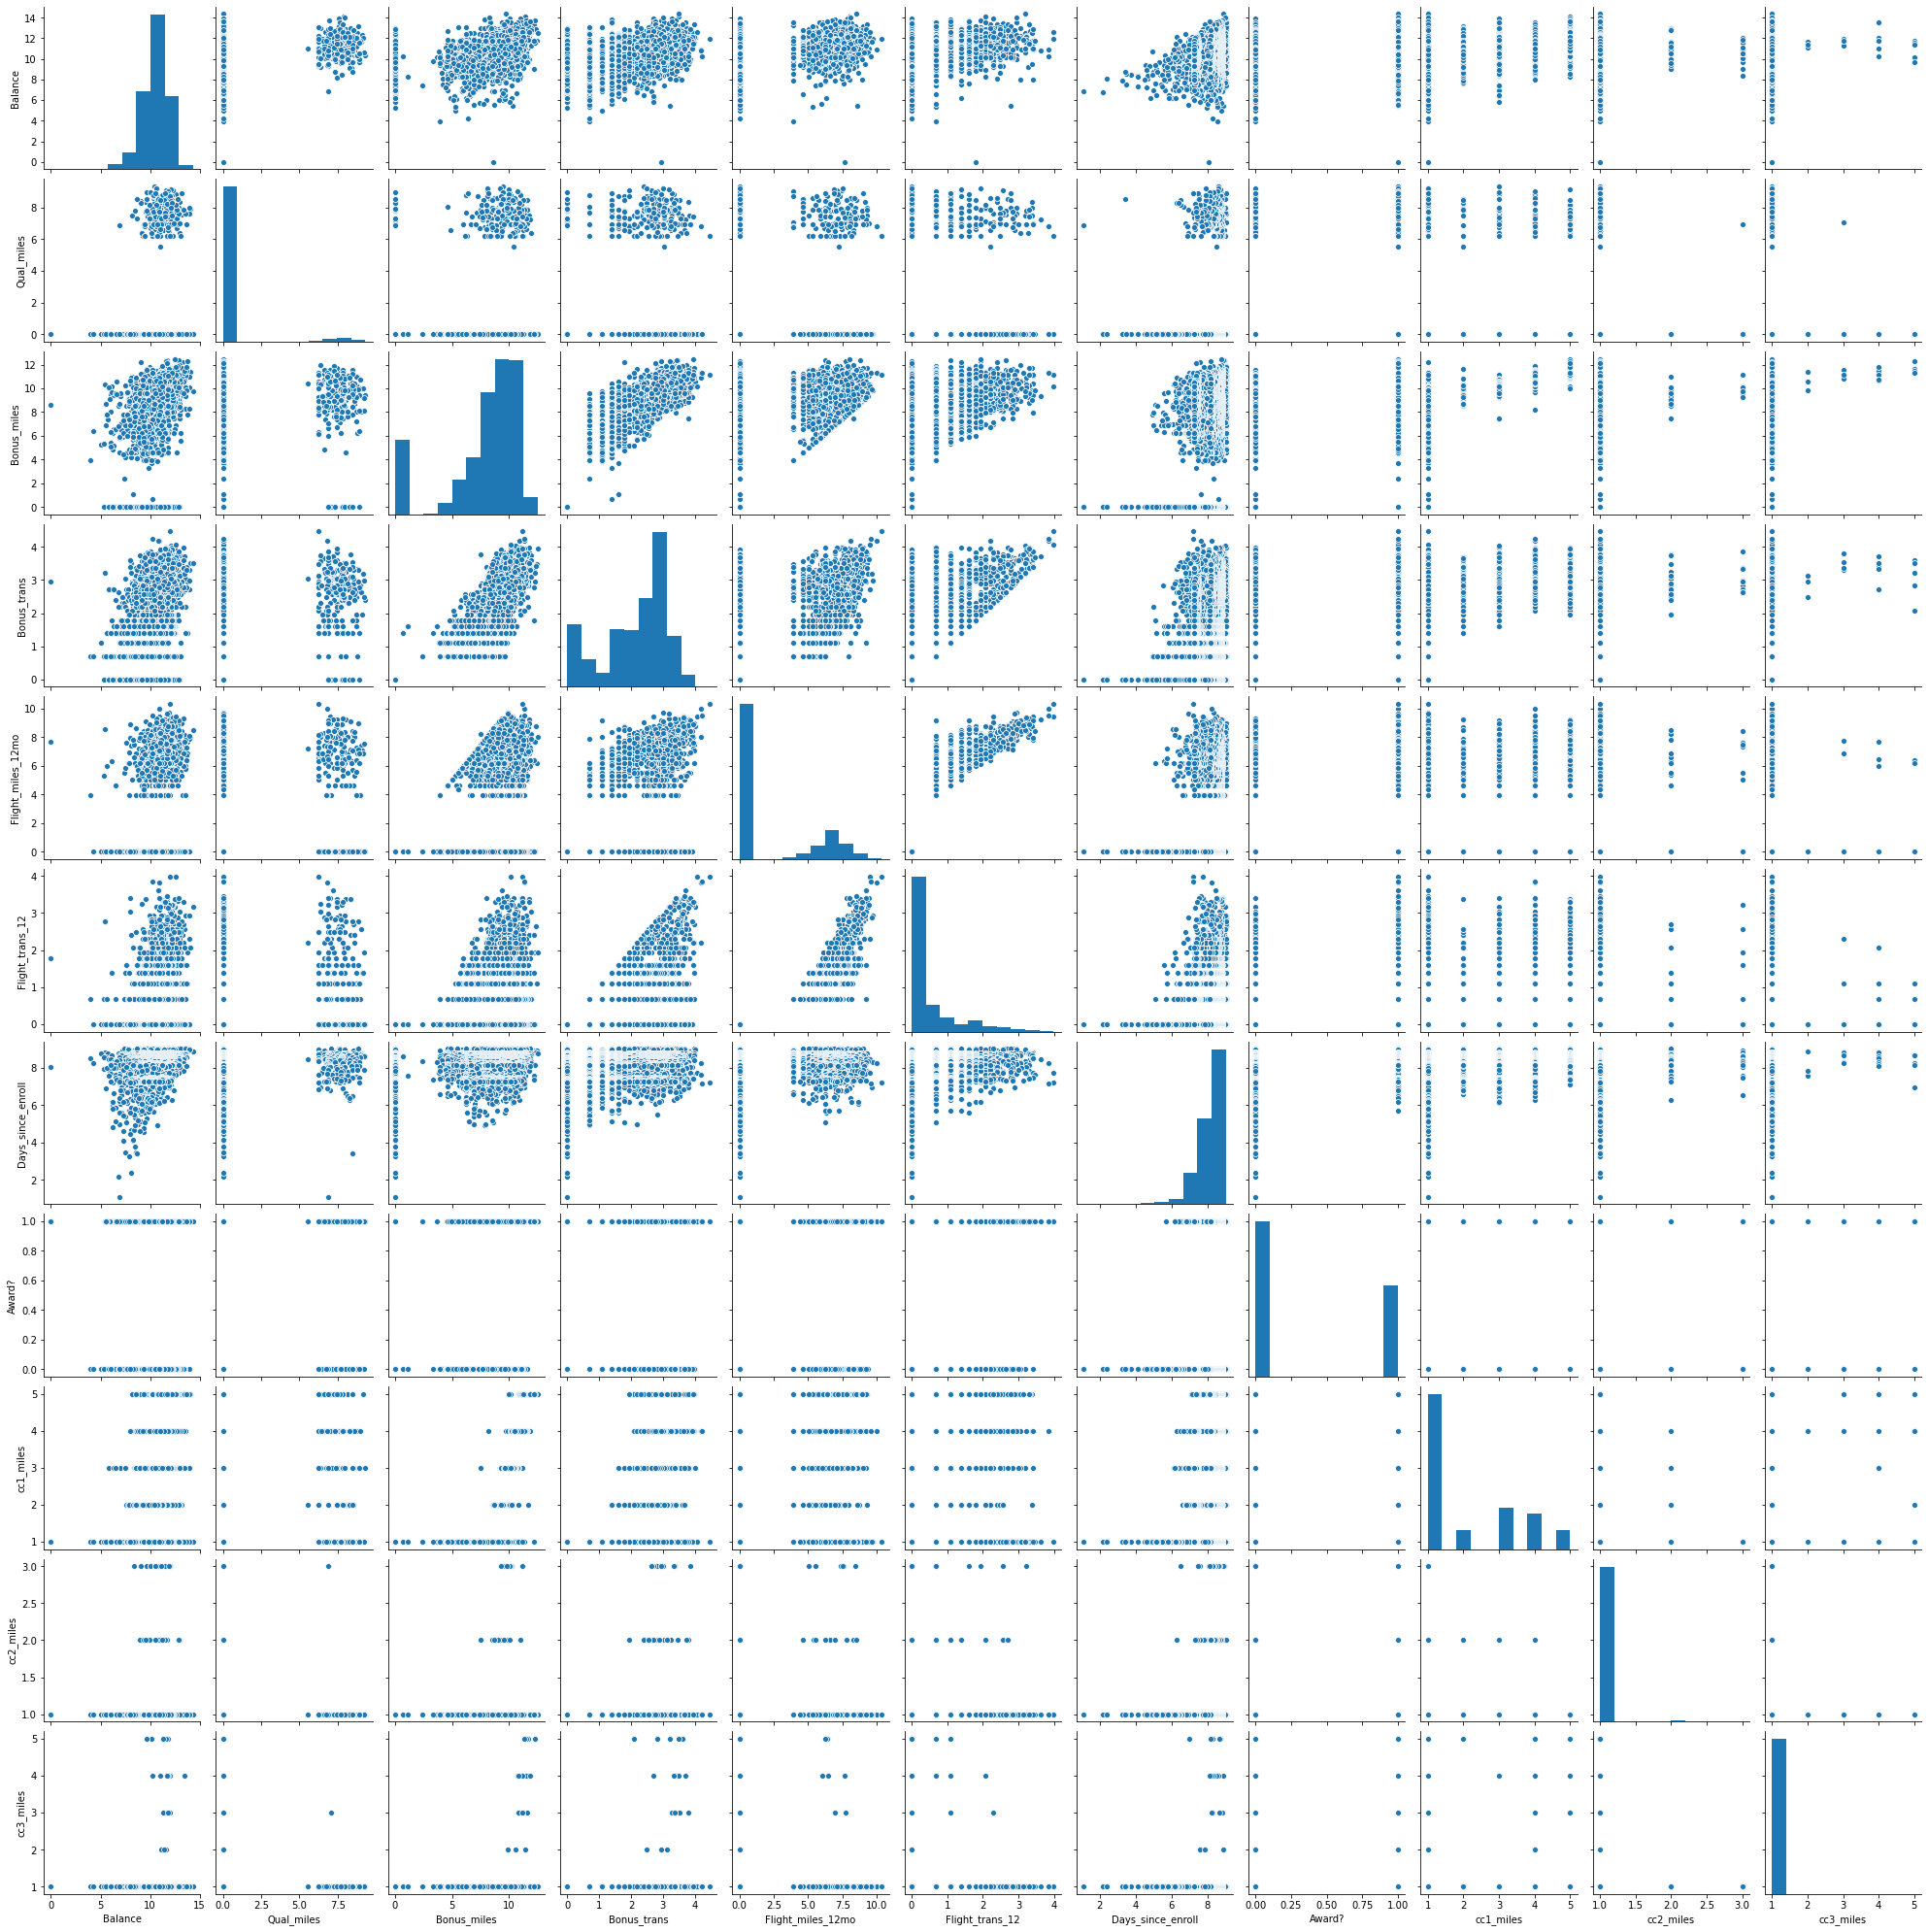

In [350]:
# Checking visually scaled data 
sns.pairplot(ewa_scaled)
plt.show()

### Part - B

#### Hierarchy Clustering

Ploting Dendrogram

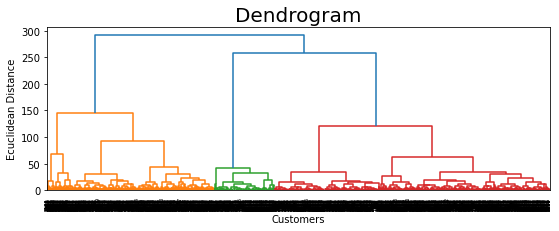

In [351]:
plt.rcParams['figure.figsize'] = (9, 3)

dendrogram = sch.dendrogram(sch.linkage(ewa_scaled, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance') 
plt.show()

### Agglomerative Clustering method
#### 3 Clusters  

In [352]:
# Creating 3 Clusters (after looking at Dendrogram above) using Agglomerative method 
hc = ac(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

# Peroforming analysis on Scaled Data
y_aghc = hc.fit_predict(ewa_scaled)

# Merging the cluster array in the Data (Orignal form - before scaling)
ewa['Clusters_Num'] = y_aghc

ewa.to_csv('ewa_AggHierarchichal_3clusters.csv', index=False)

If we clearly see Dendrogram we can spot broadly three clusters (Blue Line in graph).  It becomes difficult to judge at lower level as there are 3,999 unique customers. Also for machine to process, it took lot of time to make Dendrogram with 4K customers. If data is huge (with more dimensions and observations) then Hierarchical will become difficult to determine right number of clusters.  

### Part - C
##### Calculating the Centroid for each cluster

In [353]:
# Average of each dimension will tell the centroid.

# Grouping the data by clusters.
ewa_aggclus_df = ewa.groupby('Clusters_Num')

# Taking average of each dimension.
ewa_aggclus_df_mean = ewa_aggclus_df.mean()
ewa_aggclus_df_mean = ewa_aggclus_df_mean.drop('ID#', 1)
ewa_aggclus_df_mean.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters_Num,,,,,,,,,,,
0,109600.355539,399.11003,2.285180,1.016467,1.015719,24175.708084,15.380240,1377.068114,4.111527,4374.221557,0.569611
1,62070.078719,0.00000,2.153318,1.016476,1.012815,16596.558810,11.826087,0.000000,0.000000,4097.344622,0.312128
2,25695.631799,90.17364,1.000000,1.000000,1.000000,0.027197,0.016736,0.000000,0.000000,3500.964435,0.079498


In [354]:
ewa_aggclus_df_count = ewa_aggclus_df['Balance'].count()
ewa_aggclus_df_count

Clusters_Num
0    1336
1    2185
2     478
Name: Balance, dtype: int64

Clusters Name and Characteristics

> Cluster -1 Name: <b> Elite Customers </b>; (Old Customers, Regular Fliers, Higher Income)

> Cluster -2 Name: <b> Golden Customers </b>; (Old Customers, don't fly regular, Middle Income)

> Cluster -3 Name: <b> Silver Customers </b>; (New Customers, don't fly regular, Lower Income)


In [355]:
# -- Removing Clusters for further analysis
ewa = ewa.drop('Clusters_Num', 1)

### Part - D

#### Removing 5% of Rows Randomly and checking the results

In [356]:
n = ewa['ID#'].count()
ewa_random_95 = ewa.sample(int(n*0.95))

In [357]:
ewa_random_95.shape

(3799, 12)

In [358]:
ewa_random_95.head(2)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
3551,3574,5375,0,1,1,1,1375,11,0,0,1396,0
2473,2492,200089,4727,5,1,1,75019,21,300,2,3166,0


In [359]:
# Apply Log Scaling on the 95% Random Data
ewa_random_scaled = ewa_random_95.drop(['ID#', 'cc1_miles','cc2_miles','cc3_miles','Award?'], 1)

# Added a constant (+1) to each column's each row before doing log transformation as columns were containing 0 which will hinder the log transformation process.
for col in ewa_random_scaled.columns:
    ewa_random_scaled[col] = ewa_random_scaled[col].apply(lambda x: x+1)

In [360]:
# Performing log transformation on each column
for col in ewa_random_scaled.columns:
    ewa_random_scaled[col] = np.log(ewa_random_scaled[col])

In [361]:
# Adding rest of the columns which were discrete
ewa_random_scaled['Award?'] = ewa_random_95['Award?']
ewa_random_scaled['cc1_miles'] = ewa_random_95['cc1_miles']
ewa_random_scaled['cc2_miles'] = ewa_random_95['cc2_miles']
ewa_random_scaled['cc3_miles'] = ewa_random_95['cc3_miles']

In [362]:
ewa_random_scaled.shape

(3799, 11)

In [363]:
ewa_random_scaled.head(2)

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cc1_miles,cc2_miles,cc3_miles
3551,8.589700,0.000000,7.226936,2.484907,0.00000,0.000000,7.242082,0,1,1,1
2473,12.206523,8.461258,11.225510,3.091042,5.70711,1.098612,8.060540,0,5,1,1


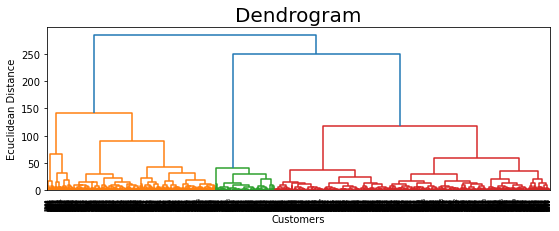

In [364]:
# Plotting Dendrogram on Random 95% Data
plt.rcParams['figure.figsize'] = (9, 3)

dendrogram = sch.dendrogram(sch.linkage(ewa_random_scaled, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance') 
plt.show()

In [365]:
# Creating 3 Clusters (after looking at Dendrogram above) using Agglomerative method 
hc = ac(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

# Peroforming analysis on Scaled Data
y_ran_aghc = hc.fit_predict(ewa_random_scaled)

# Merging the cluster array in the Data (Orignal form - before scaling)
ewa_random_95['Clusters_Num'] = y_ran_aghc

In [366]:
# Cluster analysis
ewa_ran_aggclus_df = ewa_random_95.groupby('Clusters_Num')

ewa_ran_aggclus_df_mean = ewa_ran_aggclus_df.mean()
ewa_ran_aggclus_df_mean = ewa_ran_aggclus_df_mean.drop('ID#', 1)
ewa_ran_aggclus_df_mean.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters_Num,,,,,,,,,,,
0,110325.573668,383.814263,2.282132,1.017241,1.016458,24085.840909,15.253135,1372.905956,4.079154,4396.519592,0.574451
1,61745.548170,0.000000,2.147881,1.014451,1.013487,16469.642100,11.834778,0.000000,0.000000,4097.930636,0.313584
2,26258.485459,85.400447,1.000000,1.000000,1.000000,0.029083,0.017897,0.000000,0.000000,3534.445190,0.085011


In [367]:
# This analysis is from Part C on full data
ewa_aggclus_df_mean.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters_Num,,,,,,,,,,,
0,109600.355539,399.11003,2.285180,1.016467,1.015719,24175.708084,15.380240,1377.068114,4.111527,4374.221557,0.569611
1,62070.078719,0.00000,2.153318,1.016476,1.012815,16596.558810,11.826087,0.000000,0.000000,4097.344622,0.312128
2,25695.631799,90.17364,1.000000,1.000000,1.000000,0.027197,0.016736,0.000000,0.000000,3500.964435,0.079498


In [368]:
ewa_ran_aggclus_df_count = ewa_ran_aggclus_df['Balance'].count()
ewa_ran_aggclus_df_count

Clusters_Num
0    1276
1    2076
2     447
Name: Balance, dtype: int64

#### Part D Conclusion
##### Both the Analysis have shown similar clusters. 
##### Clusters made using Random 95% data are very much similar to Clusters made before. This shows the stability of the analysis.

### Part - E
#### Kmeans Clustering

-- Elbow Method to determine the numbers of clusters.

In [369]:
#ewa_scaled.to_csv("ewa_scaled.csv")

In [370]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(ewa_scaled)
    wcss.append(km.inertia_)

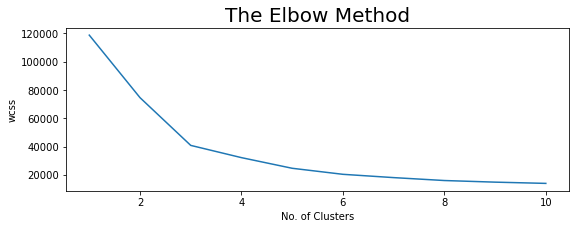

In [371]:
# -- Visualizing elbow chart    
plt.plot(range(1,11), wcss)
plt.rcParams['figure.figsize'] = (9, 3)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()    

##### -- 5 clusters look appropriate to me as last elbow occurs at 5 in No. of Clusters from the graph made above.

#### Validating Num of Clusters
##### We are now using Silhouette Score.

In [372]:
for k in range(2, 9):
    model = KMeans(n_clusters=k)
    model.fit(ewa_scaled)
    pred = model.predict(ewa_scaled)
    score = silhouette_score(ewa_scaled, pred)
    print('Silhouette Score for k = {}: {:<.3f}'.format(k, score))

Silhouette Score for k = 2: 0.419
Silhouette Score for k = 3: 0.508
Silhouette Score for k = 4: 0.531
Silhouette Score for k = 5: 0.447
Silhouette Score for k = 6: 0.426
Silhouette Score for k = 7: 0.436
Silhouette Score for k = 8: 0.394


#### 4 Clusters look appropriate for our model as per Silhouette Score.

In [373]:
model = KMeans(n_clusters = 4)
model.fit(ewa_scaled)
pred = model.predict(ewa_scaled)

In [374]:
# -- Merged the Cluster array as column in Data
ewa['Clusters_Num'] = pred

ewa.to_csv('ewa_KMeans_4clusters.csv', index=False)

In [375]:
# -- Checking out the clusters through centroids
ewa_kmeans_df = ewa.groupby('Clusters_Num')

ewa_kmeans_df_mean = ewa_kmeans_df.mean()
ewa_kmeans_df_mean = ewa_kmeans_df_mean.drop('ID#', 1)
ewa_kmeans_df_mean.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters_Num,,,,,,,,,,,
0,140045.033175,2527.066351,2.270142,1.009479,1.009479,25883.957346,16.691943,1842.336493,5.559242,4397.563981,0.691943
1,24759.217877,80.266294,1.000000,1.000000,1.000000,10.502793,0.186220,0.558659,0.011173,3557.594041,0.081937
2,104349.267203,0.000000,2.294906,1.017873,1.016979,23982.958892,15.210009,1296.452189,3.855228,4371.332440,0.549598
3,63189.341932,0.000000,2.181989,1.016886,1.013133,17006.638837,12.079737,0.000000,0.000000,4099.570356,0.317073


In [376]:
ewa_kmeans_df_count = ewa_kmeans_df['Balance'].count()
ewa_kmeans_df_count

Clusters_Num
0     211
1     537
2    1119
3    2132
Name: Balance, dtype: int64

#### Part E Conclusion

>  Elbow method was showing big change at number 3 and 5 clusters.

>  Silhouette Score was best at 4 clusters.

##### I chose 4 clusters as both the validation techniques were suggesting 3 to 5 Clusters. These techniques are industry standard but still domain knowledge plays crucial role in determining the right numbers of Clusters.

### Part - F

In [377]:
ewa_centroids_agghierarchical = ewa_aggclus_df_mean.head()
ewa_centroids_kmeans = ewa_kmeans_df_mean.head()

In [378]:
ewa_centroids_agghierarchical

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters_Num,,,,,,,,,,,
0,109600.355539,399.11003,2.285180,1.016467,1.015719,24175.708084,15.380240,1377.068114,4.111527,4374.221557,0.569611
1,62070.078719,0.00000,2.153318,1.016476,1.012815,16596.558810,11.826087,0.000000,0.000000,4097.344622,0.312128
2,25695.631799,90.17364,1.000000,1.000000,1.000000,0.027197,0.016736,0.000000,0.000000,3500.964435,0.079498


In [379]:
ewa_aggclus_df_count

Clusters_Num
0    1336
1    2185
2     478
Name: Balance, dtype: int64

In [380]:
ewa_centroids_kmeans

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Clusters_Num,,,,,,,,,,,
0,140045.033175,2527.066351,2.270142,1.009479,1.009479,25883.957346,16.691943,1842.336493,5.559242,4397.563981,0.691943
1,24759.217877,80.266294,1.000000,1.000000,1.000000,10.502793,0.186220,0.558659,0.011173,3557.594041,0.081937
2,104349.267203,0.000000,2.294906,1.017873,1.016979,23982.958892,15.210009,1296.452189,3.855228,4371.332440,0.549598
3,63189.341932,0.000000,2.181989,1.016886,1.013133,17006.638837,12.079737,0.000000,0.000000,4099.570356,0.317073


In [381]:
ewa_kmeans_df_count

Clusters_Num
0     211
1     537
2    1119
3    2132
Name: Balance, dtype: int64

### Part C
##### Clusters Name and Characteristics

> Cluster -1 Name: <b> Elite Customers </b>; (Old Customers, Regular Fliers, Higher Income)

> Cluster -2 Name: <b> Golden Customers </b>; (Old Customers, don't fly regular, Middle Income)

> Cluster -3 Name: <b> Silver Customers </b>; (New Customers, don't fly regular, Lower Income)

### Part E
##### Clusters Name and Characteristics

> Cluster -1 Name: <b> Gold Customers </b>; (Old Customers, frequent flyer, don't fly regular with us, Middle Income)

> Cluster -2 Name: <b> Elite Customers </b>; (Old Customers, frequent flyer, Regular Flyers with us, Higher Income)

> Cluster -3 Name: <b> Silver Customers </b>; (New Customers, Not frequent flyer, Started Flying Recently with us, Lower Income)

> Cluster -4 Name: <b> Platinum Customers </b>; (Old Customers, frequent flyer, don't fly regular with us, Higher Income)


As per my understanding Kmeans showed better clustering than hierarchical. Characteristics are better defined, It clearly shows more levels of division in clusters and better combinations of Characteristics.

### Part - G

If I follow Kmeans Clustering, I would target 1st and 4th Cluster i.e. Gold and Platinum Customers respectively.

Both the customers in respective clusters are old. 

> Gold Customers: We have huge number of customers (53%) in 1st Cluster they spent well as credit card shows and also these people are frequent flyers but they are not using East West Airline. 

> Platinum Customers: Similarly people in 4th Cluster are frequent flyers but they are not using East West Airline. Customers are low in number but they are wealthy.

We should target Gold Customers for Economy Class and Platinum for Business Class.

##### Offers

Gold Customers - We can offer them free Premium Economy upgrade coupon which they can use during check in. Also things like free meals, some extra weight can attract them.  

Platinum Customers - We can offer them lounge access on Airports, Discounted Taxi Services.

Also we can start level of loyalty membership cards for example we can give them silver membership card initially and can offer 5% discount on booking tickets through the same card and there will be an upgrade from silver to gold card (with more discount and facilities), if they have more frequency. This can encourage passengers to travel through same airline and earn higher membership.